# 1. Classification

 Linear regression works well when the target column we're trying to predict, the dependent variable, is ordered and continuous. `If the target column instead contains discrete values, then linear regression isn't a good fit`.

In this mission, we'll explore how to build a predictive model for these types of problems, which are known as **classification problems**. `In classification, our target column has a finite set of possible values which represent different categories a row can belong to`. **We use integers to represent the different categories so we can continue to use mathematical functions to describe how the independent variables map to the dependent variable.** 

We'll focus on binary classification for now, where the only 2 options for values are:

* 0 for the False condition,
* 1 for the True condition.

# 2. Introduction to the data

Every year high school students and college students apply to various universities and programs. Each student has a unique set of test scores, grades, and backgrounds. Somehow, the admission commitees must decide which applicants to accept or reject from their program. In this case a binary classification algorithm can be used to accept or reject applicants. To grasp the concepts of classification, we'll try to predict whether an applicant will be admitted to a graduate program in a U.S. university.

We'll be working with a dataset containing data on 644 applicants with the following columns:

* gre - applicant's score on the Graduate Record Exam, a generalized test for prospective graduate students.
Score ranges from 200 to 800.
* gpa - college grade point average.
Continuous between 0.0 and 4.0.
* admit - binary value
Binary value, 0 or 1, where 1 means the applicant was admitted to the program and 0 means the applicant was rejected.

## TODO:
* Read admissions.csv into a Dataframe named admissions.
* Use the Matplotlib method scatter to generate a scatter plot with the:
  * gpa column on the x-axis.
  * admit column on the y-axis.
* Use plt.show() to display the scatter plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
admissions=pd.read_csv('admissions.csv')

In [3]:
admissions.head()

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894


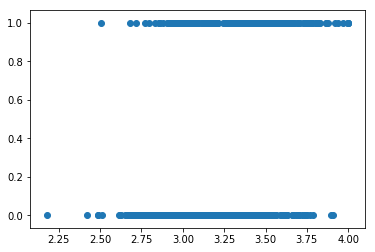

In [4]:
plt.scatter(admissions['gpa'],admissions['admit'])
plt.show()

# 3. Logistic regression

In the above scatter plot, you'll notice that the gpa column and the admit column do not have a clear linear relationship. Recall that the admit column only contains the values 0 and 1 and are used to represent binary values and the numbers themselves don't carry any weight. **When numbers are used to represent different options or categories, they are referred to as categorical values**. `Classification focuses on estimating the relationship between the independent variables and the dependent, categorical variable.`

**While a linear regression model outputs a real number as the label, a logistic regression model outputs a probability value. In binary classification, if the probability value is larger than a certain threshold probability, we assign the label for that row to 1 or 0 otherwise.**

# 4. Logistic function

In linear regression, we used the linear function y = mx + b to represent the relationship between the independent variables and the dependent variable. `In logistic regression, we use the logistic function, which is a version of the linear function that is adapted for classification.`

Unlike in linear regression, where the output can be any real value, in logistic regression the output has to be a real value between 0 and 1, since the output represents a probability value. `Note that the model can't output a negative value or it would violate this criteria.`

Here's the mathematical representation of the logistic function:

### $\sigma(t)=\dfrac{e^t}{1+e^t}$

The logistic function is broken up into 2 key parts:

* The exponential transformation, transforming all values to be positive: ${e^t}$

* The normalization transformation, transforming all values to range between 0 and 1:
### $\dfrac{t}{1+t}$

The exponential transformation and the normalization forces the output values to be squeezed between 0 and 1. If you plot just the exponential part, the output values won't be limited to the range of 0 to 1:

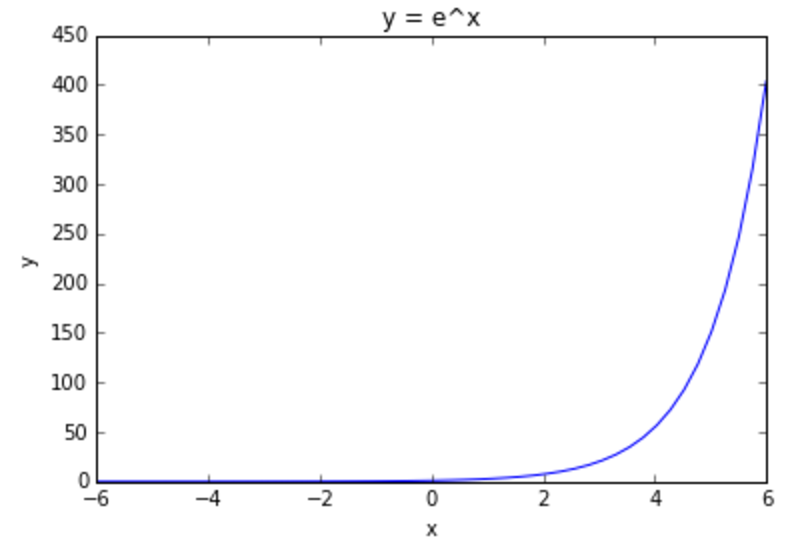

In [5]:
from IPython.display import Image
Image(filename='4esqrpy.png')

The normalization part alone unfortunately isn't sufficient since it struggles at constraining negative values:


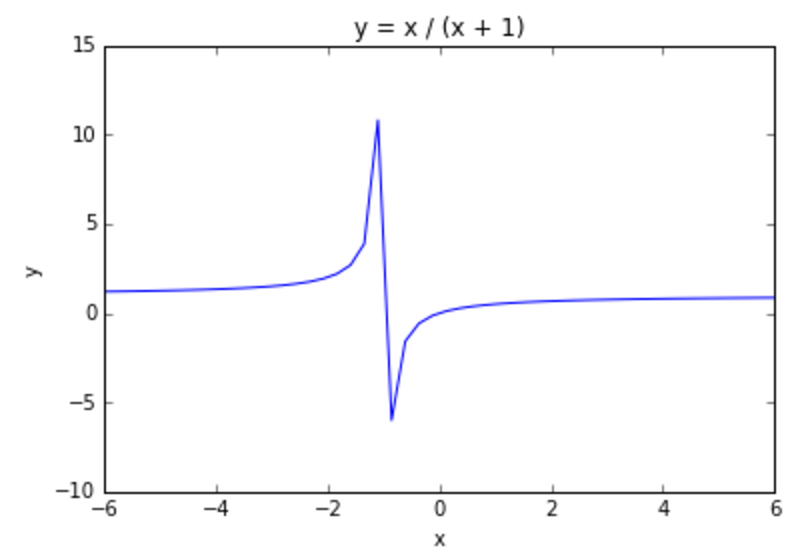

In [6]:
Image(filename='qbpTcrr.png')

# 5. Training a logistic regression model

## TODO:
* Import the LogisticRegression class and instantiate a model named logistic_model.
* Use the LogisticRegression method fit to fit the model to the data. We're only interested in constructing a model that uses gpa values to predict admit values.
* View the [documentation for the LogisticRegression class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) if you get stuck

In [7]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(solver='lbfgs')

lr.fit(admissions[['gpa']],admissions['admit'])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

# 6. Plotting probabilities

We can use the trained model to return the predicted probability for each row in the training data

To return the predicted probability, use the [predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) method. The only required parameter for this method is the num_features by num_sample matrix of observations we want scikit-learn to return predicted probabilities for. For each input row, scikit-learn will return a NumPy array with 2 probability values:

* the probability that the row should be labelled 0,
* the probability that the row should be labelled 1.

In [8]:
predict_probs=lr.predict_proba(admissions[['gpa']])

print(predict_probs[:3])

print(predict_probs[:,0][:10])
predict_probs[:,1][:10]

[[0.66343633 0.33656367]
 [0.53967962 0.46032038]
 [0.84160275 0.15839725]]
[0.66343633 0.53967962 0.84160275 0.70338133 0.68063462 0.43719912
 0.63238349 0.53555227 0.45718328 0.28091701]


array([0.33656367, 0.46032038, 0.15839725, 0.29661867, 0.31936538,
       0.56280088, 0.36761651, 0.46444773, 0.54281672, 0.71908299])

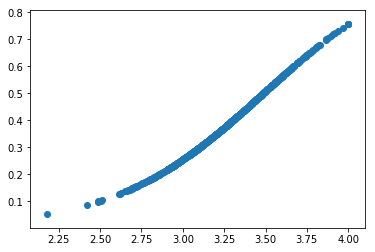

In [9]:
import matplotlib.pyplot as plt

plt.scatter(admissions[['gpa']],predict_probs[:,1])

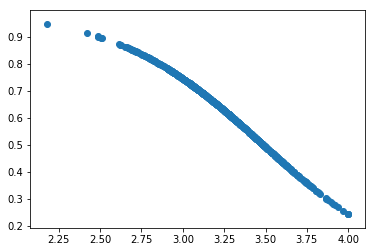

In [10]:
import matplotlib.pyplot as plt

plt.scatter(admissions[['gpa']],predict_probs[:,0])

# 7. Predict labels

You'll notice that the scatter plot suggests a linear relationship between the gpa values and the probability of being admitted. This is because logistic regression is really just an adapted version of linear regression for classification problems. `Both logistic and linear regression are used to capture linear relationships between the independent variables and the dependent variable.`

## TODO:

* Use the `LogisticRegression method predict` to return the predicted for each label in the training set.

  * The parameter for the predict method matches that of the predict_proba method:
    * X: rows of data to use for prediction.
  * Assign the result to fitted_labels.
* Create and display a scatter plot using the Matplotlib scatter function where:

  * the x-axis is the values in the gpa column,
  * the y-axis is fitted_labels

[0 0 0 0 0 1 0 0 1 1]


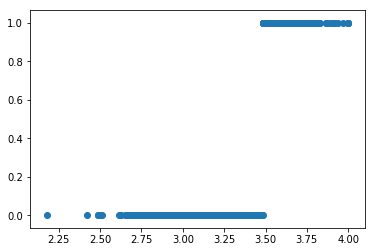

In [11]:
fitted_labels=lr.predict(admissions[['gpa']])
print(fitted_labels[:10])
plt.scatter(admissions[['gpa']],fitted_labels)